# Exam: Final Paper
# Paper: Advance Python Programming and Application

### Name: Syed Shah Zeb Khan
### F/Name: Shahid Said
### CNIC No: 16201-9911176-9
### Trainee ID: CND-0028450-2022

<a class="anchor" id="0"></a>
## Project
1. [Project](#2)
    1. [Read Data](#2.1)
    1. [Description](#2.2)
    1. [Data Visualization](#2.3)
    1. [Remove Outliers](#2.4)
    1. [Splitting Data in Train and Test](#2.5)
    1. [Scaling Data](#2.6)
    1. [Training Phase](#2.7)
        1. [SVM](#2.7.1)
    1. [Testing Phase](#2.8)
        1. [Model Score](#2.8.1)
        1. [Cross Val Score](#2.8.2)
    1. [Hyper parameter tuning](#2.9)
        1. [Grid Search CV](#2.9.1)
    1. [Evaluation](#3.1)
    1. [Confusion Matrics](#3.2)
    1. [Classification Report](#3.3)
    1. [Accuracy](#3.4)
    1. [SVM ROC Curve](#3.5)
    1. [Precision-Recall Curve](#3.6)
    1. [The End](#4)

<a class="anchor" id="1"></a>
# Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, auc, PrecisionRecallDisplay, roc_curve, roc_auc_score,precision_recall_curve
from sklearn.linear_model import LinearRegression

<a class="anchor" id="2"></a>
# Project

<a class="anchor" id="2.1"></a>
# Read Data

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<a class="anchor" id="2.2"></a>
# Data Description

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a class="anchor" id="2.3"></a>
# Data Visualization

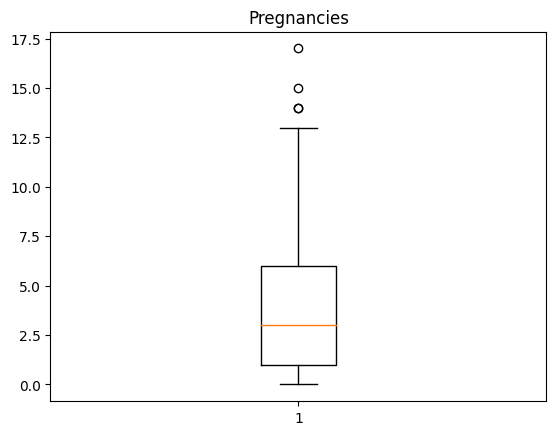

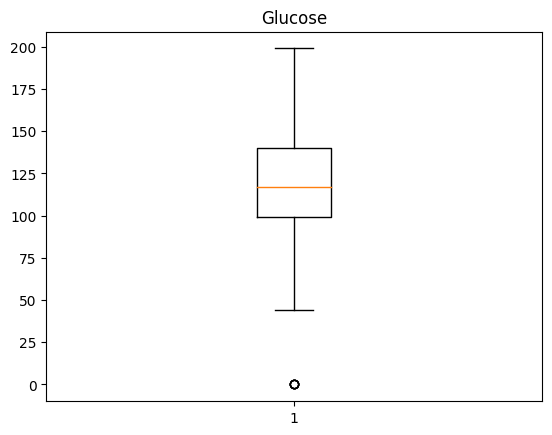

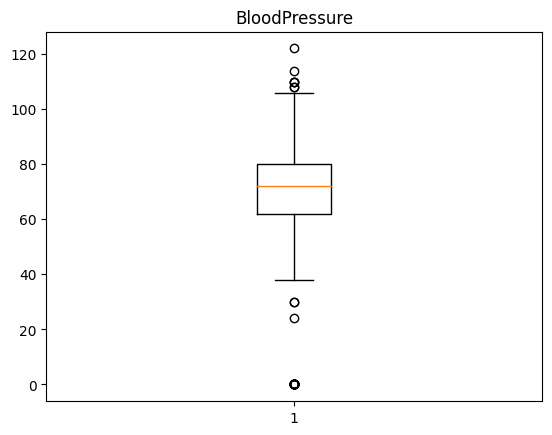

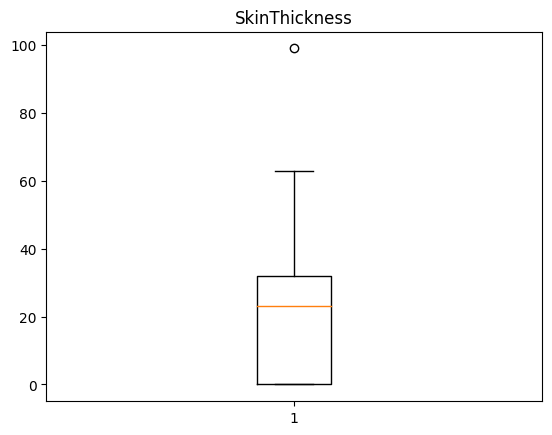

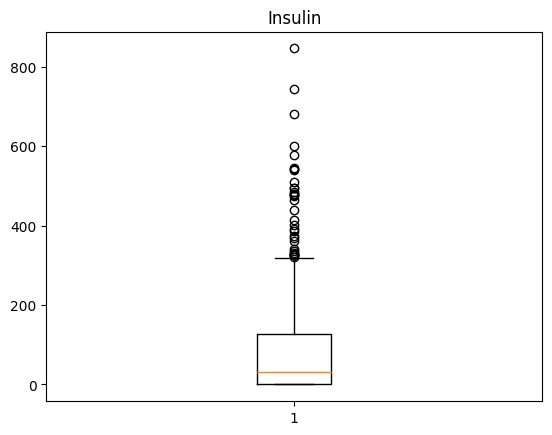

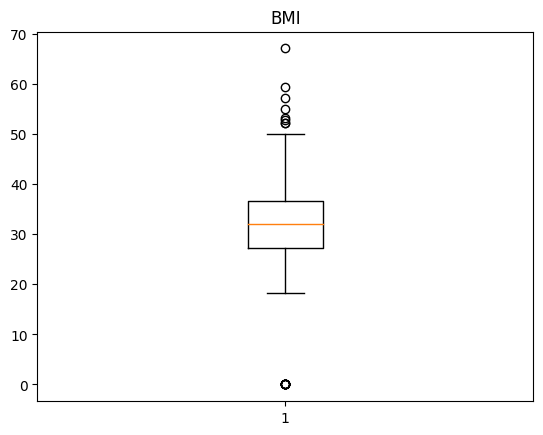

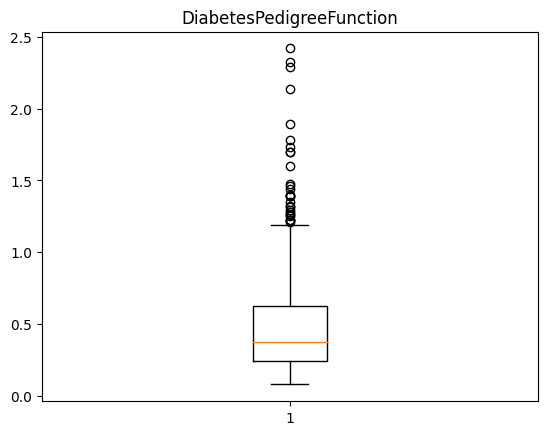

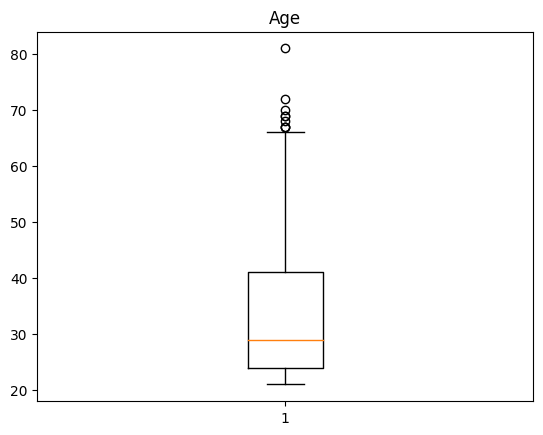

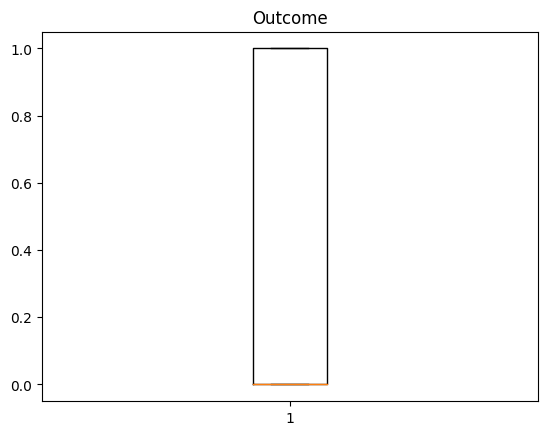

In [6]:
for i in df:
    plt.figure()
    plt.title(i)
    plt.boxplot(df[i])

<a class="anchor" id="2.4"></a>
# Remove outliers

In [7]:
for i in df:
    Q1 = np.percentile(df.loc[:,i], 25)
    Q3 = np.percentile(df.loc[:,i], 75)
    
    IQR = Q3 - Q1
    print("Old Shape : ", df.loc[:,i].shape)
    
    upper = np.where(df.loc[:,i] >= (Q3 + 1.5 * IQR))
    lower = np.where(df.loc[:,i] <= (Q1 - 1.5 * IQR))
    
    print("{} -- {}" )
    
    try:
        df.drop(upper[0], inplace=True)
    except:print("KeyError: {} not found in axis",format(upper[0]))
    try:
        df.drop(lower[0], inplace=True)
    except:print("KeyError: {} not found in axis",format(upper[0]))
        
    print("New Shape : ", df.shape)

Old Shape :  (768,)
{} -- {}
New Shape :  (764, 9)
Old Shape :  (764,)
{} -- {}
New Shape :  (759, 9)
Old Shape :  (759,)
{} -- {}
New Shape :  (711, 9)
Old Shape :  (711,)
{} -- {}
New Shape :  (710, 9)
Old Shape :  (710,)
{} -- {}
KeyError: {} not found in axis [  7  12  49  99 126 140 169 201 209 212 228 229 238 264 273 329 339 344
 361 378 384 442 478 529 538 594 602 638 649 652 657 695]
New Shape :  (710, 9)
Old Shape :  (710,)
{} -- {}
KeyError: {} not found in axis [108 112 161 175 228 279 411 619]
New Shape :  (702, 9)
Old Shape :  (702,)
{} -- {}
KeyError: {} not found in axis [  4  11  36  41  53  89 132 137 166 219 221 234 264 278 299 333 334 346
 358 371 404 484 538 550 561 563 564 598 600]
New Shape :  (702, 9)
Old Shape :  (702,)
{} -- {}
KeyError: {} not found in axis [326 411 416 443 486 604 612 621]
New Shape :  (702, 9)
Old Shape :  (702,)
{} -- {}
New Shape :  (702, 9)


<a class="anchor" id="2.5"></a>
# Splitting Data in Train and Test

In [8]:
features=df.drop("Outcome",axis=1)
target=df["Outcome"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features,target,train_size=0.8)

<a class="anchor" id="2.6"></a>
# Scaling Data

In [10]:
sca=StandardScaler()
X_sca_train = sca.fit_transform(X_train)
X_sca_test = sca.transform(X_test)

<a class="anchor" id="2.7"></a>
# Tarining phase

<a class="anchor" id="2.7.1"></a>
## SVM

In [11]:
SVM = SVC(probability=True)

In [12]:
model = SVM.fit(X_sca_train,y_train)

In [13]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.7660


<a class="anchor" id="2.8"></a>
# Testing Phase

<a class="anchor" id="2.8.1"></a>
## Model Score

In [14]:
model.score(X_sca_test,y_test)

0.75177304964539

<a class="anchor" id="2.8.2"></a>
## Cross Val Score

In [15]:
y_pred = model.predict(X_sca_test)

In [16]:
cross  = cross_val_score(SVM, X_sca_train,y_train,cv=10)

In [17]:
cross.mean()

0.7611528822055138

<a class="anchor" id="2.9"></a>
# Hyper parameter tuning

<a class="anchor" id="2.9.1"></a>
## Grid Search CV

In [18]:
parameters = {'C': [1, 10], 
          'gamma': [0.001, 0.01, 1]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_sca_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.001, 0.01, 1]})
0.771823640960809
SVC(C=1, gamma=0.01)


<a class="anchor" id="3.1"></a>
# evaluation

<a class="anchor" id="3.2"></a>
## Confusion Matrix

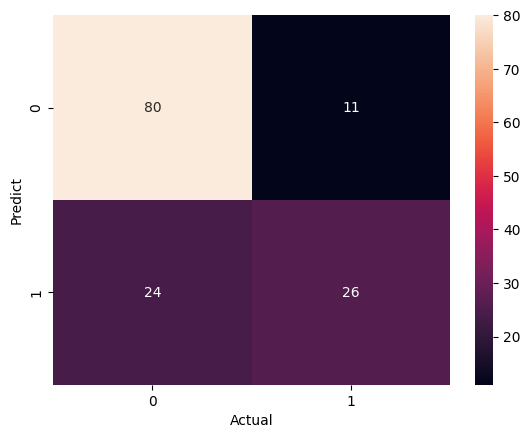

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel("Predict")
plt.xlabel("Actual")
plt.show()

<a class="anchor" id="3.4"></a>
## Classification Report

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        91
           1       0.70      0.52      0.60        50

    accuracy                           0.75       141
   macro avg       0.74      0.70      0.71       141
weighted avg       0.75      0.75      0.74       141



<a class="anchor" id="3.4"></a>
## Accuracy

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75177304964539

<a class="anchor" id="3.5"></a>
## SVM ROC Curve

In [22]:
y_score=SVM.predict_proba(X_sca_test)

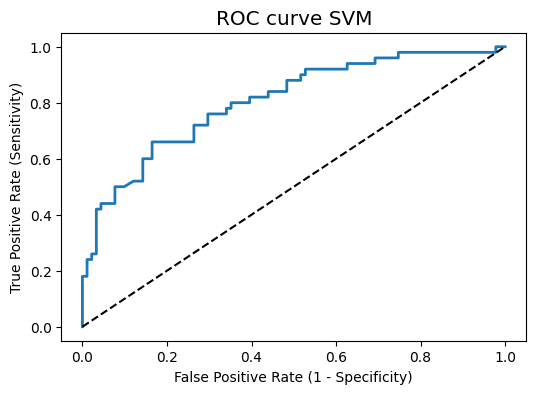

In [23]:
y_pred_test=linear_svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve SVM')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<a class="anchor" id="3.6"></a>
# Precision-Recall Curve

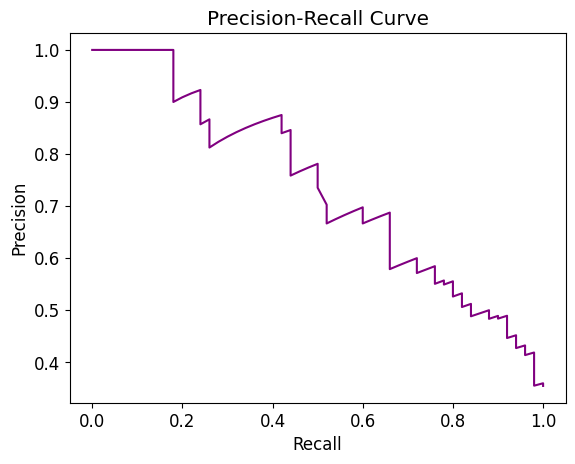

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

<a class="anchor" id="4"></a>
# End
1. [To The Top](#0)